In [1]:
!pip install pandas
import pandas as pd


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [2]:
dump=pd.read_csv("/data/notebook_files/AmazonAlexa_ReviewsDataset.tsv",sep="\t")
dump

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
dataset=dump[['verified_reviews','rating']]
dataset.columns=['Review','Sentiment']
dataset

,Review,Sentiment
0,Love my Echo!,5
1,Loved it!,5
2,"Sometimes while playing a game, you can answer...",4
3,I have had a lot of fun with this thing. My 4 ...,5
4,Music,5
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",5
3146,"Listening to music, searching locations, check...",5
3147,"I do love these things, i have them running my...",5
3148,Only complaint I have is that the sound qualit...,5


In [6]:
print(dataset['Sentiment'].value_counts())

5    2286
4     455
1     161
3     152
2      96
Name: Sentiment, dtype: int64


In [8]:
#for converting ratings to binary sentiments 0->negative and 1-> positive
def compute_sentiments(labels):
    sentiments = []
    for label in labels:
        if label > 3.0:
            sentiment = 1
        elif label <=3.0:
            sentiment =0
        sentiments.append(sentiment)
    return sentiments

In [9]:
dataset['Sentiment'] = compute_sentiments(dataset.Sentiment)
dataset

<ipython-input-9-13a36a853701>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sentiment'] = compute_sentiments(dataset.Sentiment)


,Review,Sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [10]:
print(dataset['Sentiment'].value_counts())

1    2741
0     409
Name: Sentiment, dtype: int64


In [11]:
dataset.isnull().sum()

Review 0
Sentiment 0
dtype: int64

In [13]:
x = dataset["Review"]
y = dataset["Sentiment"]

In [14]:
#lets make a tokenizer for preprocessing with spacy
!pip install spacy
!python3 -m spacy download en_core_web_sm


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [16]:
#the text_data cleaning function will be our preprocessing function for lemmatizing 
import spacy
nlp = spacy.load('en_core_web_sm')
import string
punct = string.punctuation

from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)
def text_data_cleaning(sentence):
    doc = nlp(sentence)                         # spaCy tokenize text 

    tokens = [] # list of tokens
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)

    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [ ]:
#for using the lemma (root) of the words and convert them to lower forms
#remove punc, stopwords
#I created that function above
#I will iterate all the reviews with that function for preprocessing

In [17]:
exampletoken=text_data_cleaning("Those were the best days of my life")
print(exampletoken)

['good', 'day', 'life']


In [22]:
!pip install sklearn
!pip3 install scikit-learn

  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... - done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=2bf959d112897b7695ee82eb76ce623e558ec65617524902aecf3a797a429276
  Stored in directory: /home/datalore/.cache/pip/wheels/3b/1f/cd/e6505747b74c9bccdec4a1d8a768960cbd49d5ba8c88a58652
Successfully built sklearn

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [19]:
#please refer to tfidf presentation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(tokenizer=text_data_cleaning)

In [20]:
#lets begin with splitting our dataset to train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=dataset.Sentiment)

In [21]:
x_train.shape, x_test.shape

((2520,), (630,))

In [23]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()

In [35]:
#or you can use another classifier for your model creation
from sklearn.linear_model import LogisticRegression
classifier2=LogisticRegression()

In [51]:
#or you can use another classifier for your model creation
from sklearn.neighbors import KNeighborsClassifier
classifier3=KNeighborsClassifier()

In [52]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('tfidf',tfidf),('clf',classifier3)])

#it will first do vectorizer -tfidf- then classify in terms of classification method

In [53]:
pipeline.fit(x_train,y_train)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7efcdcaac1f0>)),
 ('clf', KNeighborsClassifier())]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('tfidf',
 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7efcdcaac1f0>)),
 ('clf', KNeighborsClassifier())]) TfidfVectorizer TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7efcdcaac1f0>) KNeighborsClassifier KNeighborsClassifier()

In [54]:
y_pred=pipeline.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [56]:
cm=confusion_matrix(y_test,y_pred,labels=pipeline.classes_)
print(cm)

[[  1  81]
 [  0 548]]


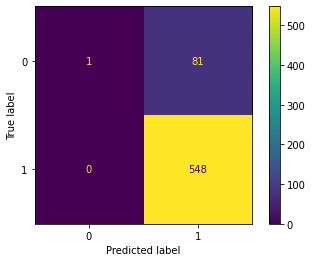

In [57]:
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()
plt.show()

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        82
           1       0.87      1.00      0.93       548

    accuracy                           0.87       630
   macro avg       0.94      0.51      0.48       630
weighted avg       0.89      0.87      0.81       630



In [59]:
prediction = pipeline.predict(["Alexa is a bad tool"])
prediction

array([1])

In [61]:
import pickle
with open("model.pkl","wb") as f:
        pickle.dump(pipeline,f)

In [62]:
import pickle
file_path= '/data/notebook_files/.private/model.pkl'
with open(file_path,'rb') as f:
    model=pickle.load(f)
model.predict(["alexa is good"])[0]

FileNotFoundError: FileNotFoundError: [Errno 2] No such file or directory: '/data/notebook_files/.private/model.pkl'